In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Enhanced_Sales_Data.csv')

# Preview the data
print(df.head())


         Date Region    Product  Sales  Units Sold
0  2024-01-01  North  Product A  500.0        25.0
1  2024-01-01  North  Product B    NaN        15.0
2  2024-01-01  South  Product A  700.0         NaN
3  2024-01-02   East  Product C  400.0        20.0
4  2024-01-02   West  Product D  350.0         NaN


In [2]:
# Overview of the data
print(df.head())  # Displays the  first 5 rows



         Date Region    Product  Sales  Units Sold
0  2024-01-01  North  Product A  500.0        25.0
1  2024-01-01  North  Product B    NaN        15.0
2  2024-01-01  South  Product A  700.0         NaN
3  2024-01-02   East  Product C  400.0        20.0
4  2024-01-02   West  Product D  350.0         NaN


In [3]:

print(df.info())  # Info about columns, data types, and non-null values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        9 non-null      object 
 1   Region      9 non-null      object 
 2   Product     9 non-null      object 
 3   Sales       7 non-null      float64
 4   Units Sold  7 non-null      float64
dtypes: float64(2), object(3)
memory usage: 488.0+ bytes
None


In [4]:
print(df.describe())  # Summary statistics for numerical columns

            Sales  Units Sold
count    7.000000    7.000000
mean   500.000000   25.285714
std    119.023807    7.994045
min    350.000000   15.000000
25%    425.000000   21.000000
50%    500.000000   25.000000
75%    550.000000   27.500000
max    700.000000   40.000000


# Handling missing values

In [5]:
# Fill missing sales values with the mean of the column
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())

# Fill missing units sold with the median of the column
df['Units Sold'] = df['Units Sold'].fillna(df['Units Sold'].median())

# Verify missing values
print(df.isnull().sum())


Date          0
Region        0
Product       0
Sales         0
Units Sold    0
dtype: int64


In [6]:
# Inspect specific rows that originally had missing values
print(df)


         Date Region    Product  Sales  Units Sold
0  2024-01-01  North  Product A  500.0        25.0
1  2024-01-01  North  Product B  500.0        15.0
2  2024-01-01  South  Product A  700.0        25.0
3  2024-01-02   East  Product C  400.0        20.0
4  2024-01-02   West  Product D  350.0        25.0
5  2024-01-02  North  Product A  500.0        40.0
6  2024-01-03  South  Product B  600.0        30.0
7  2024-01-03   East  Product D  450.0        22.0
8  2024-01-03   West  Product C  500.0        25.0


In [7]:
# Check what values were used to fill missing data
print("Mean Sales:", df['Sales'].mean())
print("Median Units Sold:", df['Units Sold'].median())


Mean Sales: 500.0
Median Units Sold: 25.0


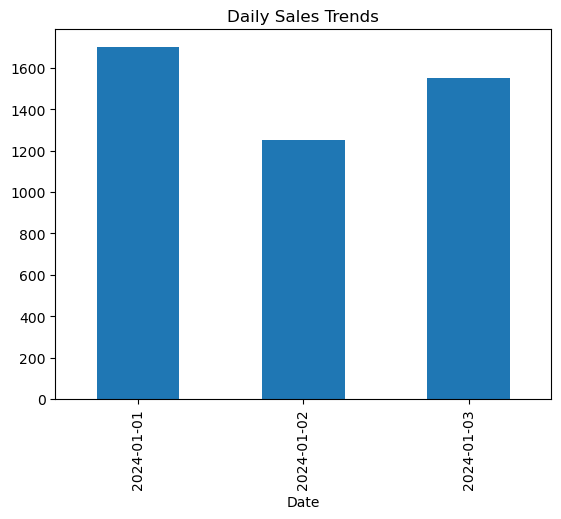

In [9]:
# Total sales by region
region_sales = df.groupby('Region')['Sales'].sum()

# Average units sold per product
product_units = df.groupby('Product')['Units Sold'].mean()

# Sales trends over time
daily_sales = df.groupby('Date')['Sales'].sum()

# Visualize sales trends
daily_sales.plot(kind='bar', title='Daily Sales Trends')
plt.show()



In [10]:
# Prepare data for modeling
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Features and target
X = df[['Day', 'Month', 'Year', 'Units Sold']]
y = df['Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


RMSE: 10.911762998421139


In [11]:
# Predict future sales
future_data = pd.DataFrame({
    'Day': [1, 2, 3],
    'Month': [2, 2, 2],
    'Year': [2024, 2024, 2024],
    'Units Sold': [30, 40, 50]
})

future_sales = model.predict(future_data)
future_data['Predicted Sales'] = future_sales

# Save processed data and predictions
df.to_csv('Processed_Enhanced_Sales_Data.csv', index=False)
future_data.to_csv('Future_Sales_Predictions.csv', index=False)
